In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
from mpl_toolkits.basemap import Basemap
import folium
import matplotlib.pyplot as plt
from matplotlib.patches import Polygon as Poly
import json
from geojson import Feature, FeatureCollection, Polygon

In [2]:
# загрузка майских значений и регионов:

may_2016_aggr = pd.read_csv('may_2016_aggr.csv')

In [3]:
may_2016_aggr

,region,2016-05-01 00:00:00,2016-05-01 01:00:00,2016-05-01 02:00:00,2016-05-01 03:00:00,2016-05-01 04:00:00,2016-05-01 05:00:00,2016-05-01 06:00:00,2016-05-01 07:00:00,2016-05-01 08:00:00,...,2016-05-31 14:00:00,2016-05-31 15:00:00,2016-05-31 16:00:00,2016-05-31 17:00:00,2016-05-31 18:00:00,2016-05-31 19:00:00,2016-05-31 20:00:00,2016-05-31 21:00:00,2016-05-31 22:00:00,2016-05-31 23:00:00
0,15,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,16,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,25,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,27,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,32,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1212,2483,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1213,2484,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1214,2485,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1215,2486,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
# Количество поездок такси из каждой географической зоны 
may_2016_aggr['trips_count'] = may_2016_aggr.iloc[:, 1:].sum(axis=1)
may_2016_aggr = may_2016_aggr.loc[:,['region','trips_count']]
may_2016_aggr

,region,trips_count
0,15,1
1,16,1
2,25,1
3,27,1
4,32,19
...,...,...
1212,2483,2
1213,2484,1
1214,2485,2
1215,2486,3


In [5]:
# Количество поездок такси из всех географических зон
may_2016_aggr['trips_count'].sum()

11626521

In [6]:
# Нахождение точного индекса для мах значения 'trips_count'
may_2016_aggr['trips_count'].idxmax(axis=0, skipna=True)

492

In [7]:
may_2016_aggr.loc[492,['region','trips_count']]

region           1282
trips_count    638799
Name: 492, dtype: int64

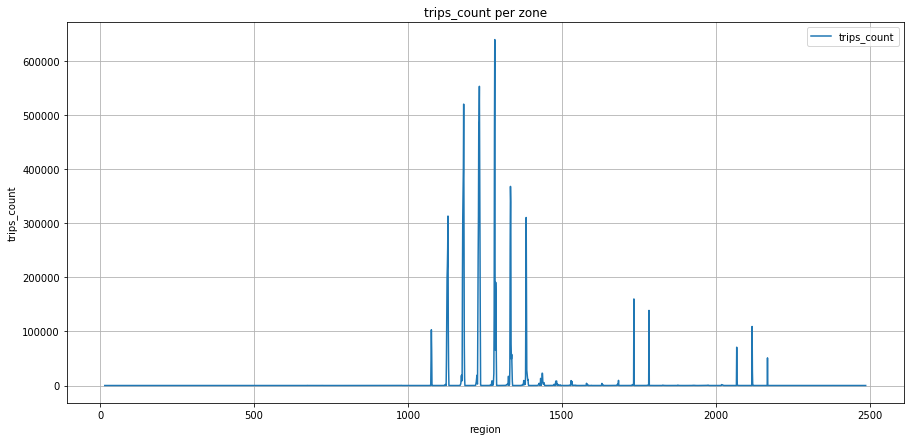

In [8]:
may_2016_aggr.plot(x='region', y='trips_count', figsize=(15,7))
plt.ylabel('trips_count')
plt.grid(True)
plt.title('trips_count per zone')
plt.show()

In [9]:
# Обьединение регионов с кол-вом поездок с координатами
regions = pd.read_csv('regions.csv', delimiter=';')
regions

,region,west,east,south,north
0,1,-74.255590,-74.244478,40.496120,40.504508
1,2,-74.255590,-74.244478,40.504508,40.512896
2,3,-74.255590,-74.244478,40.512896,40.521285
3,4,-74.255590,-74.244478,40.521285,40.529673
4,5,-74.255590,-74.244478,40.529673,40.538061
...,...,...,...,...,...
2495,2496,-73.711122,-73.700010,40.873589,40.881977
2496,2497,-73.711122,-73.700010,40.881977,40.890365
2497,2498,-73.711122,-73.700010,40.890365,40.898754
2498,2499,-73.711122,-73.700010,40.898754,40.907142


In [10]:
coord_trips_count = regions.merge(may_2016_aggr)
coord_trips_count

,region,west,east,south,north,trips_count
0,15,-74.255590,-74.244478,40.613555,40.621943,1
1,16,-74.255590,-74.244478,40.621943,40.630331,1
2,25,-74.255590,-74.244478,40.697437,40.705825,1
3,27,-74.255590,-74.244478,40.714213,40.722601,1
4,32,-74.255590,-74.244478,40.756154,40.764542,19
...,...,...,...,...,...,...
1212,2483,-73.711122,-73.700010,40.764542,40.772931,2
1213,2484,-73.711122,-73.700010,40.772931,40.781319,1
1214,2485,-73.711122,-73.700010,40.781319,40.789707,2
1215,2486,-73.711122,-73.700010,40.789707,40.798095,3


In [11]:
# Количество ячеек из которых в мае не было ни одной поездки:
len(regions)-len(may_2016_aggr)

1283

C:\Users\rosas\anaconda3\lib\site-packages\pyproj\crs\crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))
C:\Users\rosas\anaconda3\lib\site-packages\pyproj\crs\crs.py:294: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  projstring = _prepare_from_string(" ".join((projstring, projkwargs)))


http://server.arcgisonline.com/ArcGIS/rest/services/World_Street_Map/MapServer/export?bbox=1467599.5584364492,189268.68297458635,1617116.0573974547,346659.1845749213&bboxSR=2261&imageSR=2261&size=1000,1052&dpi=96&format=png32&transparent=true&f=image


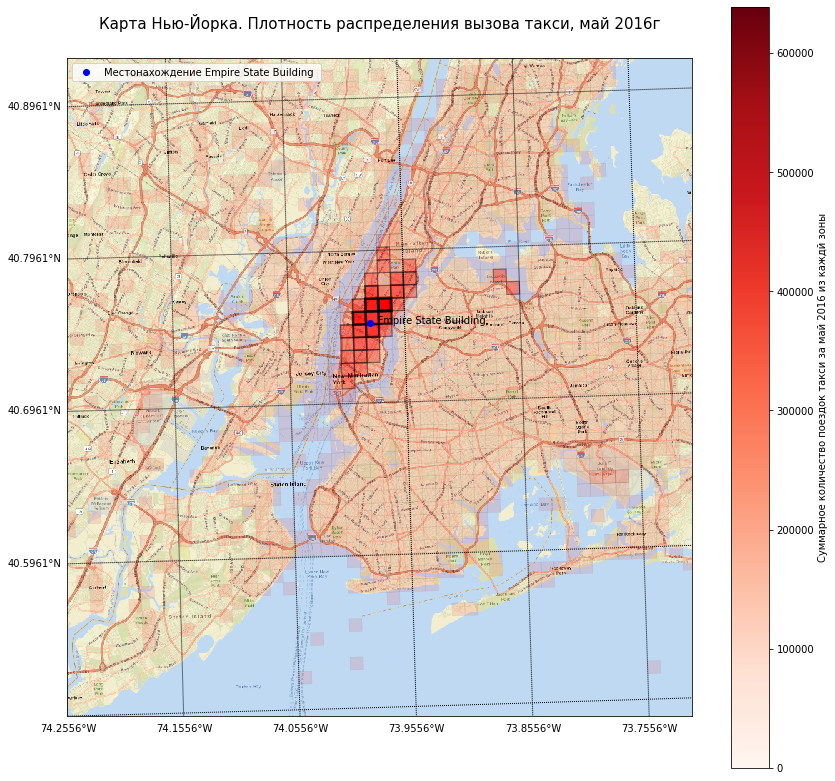

In [12]:
# Карта Нью-Йорка с помощью библиотеки Basemap:
cmap = plt.get_cmap('seismic')
fig = plt.figure(figsize=(14, 14))
map_m = Basemap(llcrnrlon=-74.25559, llcrnrlat=40.49612, urcrnrlon=-73.70001, urcrnrlat=40.91553,
              lon_0=-73.985756, lat_0=40.748306, projection='lcc', resolution='h', epsg=2261)

#Наложение карты World_Street_Map 
map_m.arcgisimage(service='World_Street_Map', xpixels = 1000, verbose= True)

map_m.drawparallels(np.arange(40.49612, 40.91553,0.1),labels=[True,False,False,False])
map_m.drawmeridians(np.arange(-74.25559, -73.70001, 0.1),labels=[0,0,0,1])


# Прорисовка плотности регионов
trips_max = coord_trips_count.trips_count.max()
for i in range(len(coord_trips_count)):
    alpha = coord_trips_count.trips_count[i]/trips_max
    if alpha <= 0.05:
        alpha = 0.1
    elif alpha > 0.05 and alpha <=0.2:
        alpha = 0.2
    elif alpha > 0.2 and alpha <=0.4 :
        alpha = 0.4   
    
    colors = cmap(alpha)
    x1,y1 = map_m(coord_trips_count.west[i], coord_trips_count.south[i])
    x2,y2 = map_m(coord_trips_count.west[i], coord_trips_count.north[i])
    x3,y3 = map_m(coord_trips_count.east[i], coord_trips_count.north[i])
    x4,y4 = map_m(coord_trips_count.east[i], coord_trips_count.south[i])
    poly = Poly([(x1,y1),(x2,y2),(x3,y3),(x4,y4)],facecolor='red',edgecolor='black',linewidth=alpha*3, alpha=alpha )
    
    plt.gca().add_patch(poly)
    
# Создание colorbar    
my_cmap = plt.get_cmap('Reds')
sm = plt.cm.ScalarMappable(cmap=my_cmap, norm=plt.Normalize(vmin=0.0, vmax=trips_max))
plt.colorbar(sm, label='Cуммарное количество поездок такси за май 2016 из каждй зоны', orientation='vertical')



# Рисуем Empire State Building 
xpt, ypt = map_m(-73.985756,40.748306)    
map_m.plot(xpt, ypt,'bo', label = 'Местонахождение Empire State Building ')  
plt.text(xpt+500,ypt,'Empire State Building')

# Подписи
plt.title('Карта Нью-Йорка. Плотность распределения вызова такси, май 2016г', pad=30, fontsize=15)
plt.legend(loc='best')

plt.show()

### Определение функций для прорисовки интерактивных карт:

In [13]:
# Приложение А: Функция для создания geojson 

def geojson_collection(coord_trips_count):
    
    features = []
    for i in range(len(coord_trips_count)):
        x1,y1 = coord_trips_count.west[i], coord_trips_count.south[i]
        x2,y2 = coord_trips_count.west[i], coord_trips_count.north[i]
        x3,y3 = coord_trips_count.east[i], coord_trips_count.north[i]
        x4,y4 = coord_trips_count.east[i], coord_trips_count.south[i]
        features.append(
            Feature(
                geometry = Polygon([[(x1,y1), (x2,y2), (x3,y3), (x4,y4), (x1,y1) ]]),
                properties = {
                    'region': int(coord_trips_count.region[i])
                }
            )
        )
    collection = FeatureCollection(features)
    
    return json.dumps(collection)  

#Прорисовка карты и сведений о поездках:

def painter(collection, ctc, bin_n):
    m = folium.Map(location=[40.748306, -73.985756], zoom_start=10)
    folium.Marker(
        location=[40.6892776, -74.0445938],
        popup='Statue of Liberty',
        icon=folium.Icon(color='red', icon='info-sign')
    ).add_to(m)
    folium.Choropleth(
        geo_data=collection,
        name='choropleth',
        data=ctc,
        key_on='feature.properties.region',
        columns=['region','trips_count'],
        fill_color='RdPu',
        fill_opacity=0.5,
        line_opacity=0.3,
        bins=bin_n,
        legend_name='Average monthly number of trips (%)'
    ).add_to(m)
    return display (m)

In [14]:
# СОЗДАНИЕ ИНТЕРАКТИВНОЙ КАРТЫ НЬЮ-ЙОРКА И ОТОБРАЖЕНИЕ СРЕДНЕГО ЗА МЕСЯЦ КОЛИЧЕСТВО ПОЕЗДОК В ЧАС ИЗ КАЖДОЙ ЗОНЫ

hh = 744 # кол-во часов в мае
coord_trips_count['trips_count'] = coord_trips_count['trips_count']/hh

# вызываем функцию по созданию geojson: geojson_collection(coord_trips_count):
collection = geojson_collection(coord_trips_count)

# Данные для Choropleth:
ctc= coord_trips_count.loc[:, ['region', 'trips_count']]
bin_n = list(ctc['trips_count'].quantile([0, 0.1, 0.8, 0.95, 1]))

#Вызываем функцию прорисовки карты и сведений о поездках:
painter(collection, ctc, bin_n)

In [15]:
# СОЗДАНИЕ ИНТЕРАКТИВНОЙ КАРТЫ НЬЮ-ЙОРКА И ОТОБРАЖЕНИЕ СРЕДНЕГО ЗА МЕСЯЦ КОЛИЧЕСТВО ПОЕЗДОК В ЧАС ИЗ КАЖДОЙ ЗОНЫ.
# Фильтр на меньше 5и поездок в час

# Фильтрация строго меньше 5и поездок в час:
coord_trips_count_5 = coord_trips_count[coord_trips_count['trips_count']>=5]
coord_trips_count_5=coord_trips_count_5.reset_index()

# вызываем функцию по созданию geojson: geojson_collection(coord_trips_count):
collection_5 = geojson_collection(coord_trips_count_5)

# Данные для Choropleth:
ctc_5 = coord_trips_count_5.loc[:, ['region', 'trips_count']]
bin_n_5 = list(ctc_5['trips_count'].quantile([0, 0.25, 0.5, 0.75, 1]))

#Вызываем функцию прорисовки карты и сведений о поездках:
painter(collection_5, ctc_5, bin_n_5)

In [16]:
#Количество ячеек:
len(coord_trips_count_5)

102

In [17]:
coord_trips_count_5

,index,region,west,east,south,north,trips_count
0,344,1075,-74.022246,-74.011135,40.697437,40.705825,66.799731
1,345,1076,-74.022246,-74.011135,40.705825,40.714213,138.266129
2,346,1077,-74.022246,-74.011135,40.714213,40.722601,86.802419
3,379,1125,-74.011135,-74.000023,40.697437,40.705825,66.041667
4,380,1126,-74.011135,-74.000023,40.705825,40.714213,181.892473
...,...,...,...,...,...,...,...
97,1031,2068,-73.800014,-73.788903,40.638719,40.647108,95.056452
98,1032,2069,-73.800014,-73.788903,40.647108,40.655496,10.545699
99,1058,2118,-73.788903,-73.777791,40.638719,40.647108,146.490591
100,1059,2119,-73.788903,-73.777791,40.647108,40.655496,34.692204


### Ноутбук опубликован на https://github.com/rosasha/Yellow-Taxi

### В интерактивном режиме можно посмотреть здесь: https://nbviewer.jupyter.org/github/rosasha/Yellow-Taxi/blob/master/TAXI2_best.ipynb